#### Impoorting the required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Reading the dataset

In [14]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.isnull().sum()


HeartDisease             0
BMI                      0
Smoking                  0
AlcoholDrinking          0
Stroke                   0
PhysicalHealth           0
MentalHealth             0
DiffWalking              0
Sex                      0
AgeCategory              0
Race                     0
Diabetic                 0
PhysicalActivity         0
GenHealth                0
SleepTime                0
Asthma                   0
KidneyDisease            0
SkinCancer               0
Unnamed: 18         319795
Unnamed: 19         319795
Unnamed: 20         319795
Unnamed: 21         319795
Unnamed: 22         319795
Unnamed: 23         319795
Unnamed: 24         319795
Unnamed: 25         319795
Unnamed: 26         319795
Unnamed: 27         319795
Unnamed: 28         319795
Unnamed: 29         319795
Unnamed: 30         319795
Unnamed: 31         319795
Unnamed: 32         319795
Unnamed: 33         319795
Unnamed: 34         319795
Unnamed: 35         319795
Unnamed: 36         319795
U

In [15]:
print(df.dtypes) #viewing the type of the attributes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
Unnamed: 18         float64
Unnamed: 19         float64
Unnamed: 20         float64
Unnamed: 21         float64
Unnamed: 22         float64
Unnamed: 23         float64
Unnamed: 24         float64
Unnamed: 25         float64
Unnamed: 26         float64
Unnamed: 27         float64
Unnamed: 28         float64
Unnamed: 29         float64
Unnamed: 30         float64
Unnamed: 31         float64
Unnamed: 32         float64
Unnamed: 33         float64
Unnamed: 34         float64
Unnamed: 35         

### Drop The null Values

In [17]:
df = df.drop(df.columns[18:44], axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## 1-Preprocessing

In [18]:
#encoding ('Yes','No') to (1,0)
df.replace({'Yes':1,'No':0}, inplace=True)
#encoding ('Female','Male') to (1,0)
df.replace({'Female':1,'Male':0}, inplace=True)

In [19]:
#encoding ('Excellent','Very good' ,'Good','Poor') to (4,3,2,1)
df['GenHealth'].unique()
df.replace({'Excellent':4,'Very good':3,'Good':2,'Fair':1,'Poor':0}, inplace=True)

In [20]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [21]:
#mapping 
age_mapping = {
   '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

df['AgeCategory'].replace(age_mapping, inplace=True)

In [22]:
df = pd.get_dummies(df, columns=["Race"], prefix=["Race"])
df = pd.get_dummies(df, columns=["Diabetic"], prefix=["Diabetic"])

print(df.dtypes)

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                           int64
MentalHealth                             int64
DiffWalking                              int64
Sex                                      int64
AgeCategory                              int64
PhysicalActivity                         int64
GenHealth                                int64
SleepTime                                int64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
Race_American Indian/Alaskan Native       bool
Race_Asian                                bool
Race_Black                                bool
Race_Hispanic                             bool
Race_Other                                bool
Race_White   

In [23]:
df.to_csv('New_Presonal_Key.csv', index=False)

In [9]:
#defining the X fetures and y Label 
X = df.drop(["HeartDisease"], axis=1).values
y = df["HeartDisease"].values

## Creating The Moodel

In [10]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Stardarizing the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Creating and Tuning the SVM Model with Grid Search
# Define a parameter grid for hyperparameter tuning

param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0005, 0.001, 0.005]}

# Apply Principal Component Analysis (PCA) for feature reduction
# Retain 90% of the variance, whiten the data, and set a random seed for reproducibility
pca = RandomizedPCA(n_components=0.9, whiten=True, random_state=42)

# Use balanced class weights to handle imbalanced datasets
svm = SVC(kernel='rbf', class_weight='balanced')
# Create a pipeline with PCA and SVM
model = make_pipeline(pca, svm)

# Set up a grid search for hyperparameter tuning
# Use cross-validation with 2 folds and print verbose information
grid = GridSearchCV(model, param_grid, cv=2, verbose=2)

# Measure the time it takes to perform grid search and model fitting
%time grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=18.1min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=18.4min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=15.8min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=11.3min
[CV] END .........................svc__C=1, svc__gamma=0.005; total time= 9.8min
[CV] END .........................svc__C=1, svc__gamma=0.005; total time= 9.0min
[CV] END ........................svc__C=5, svc__gamma=0.0005; total time= 9.5min
[CV] END ........................svc__C=5, svc__gamma=0.0005; total time=10.0min
[CV] END .........................svc__C=5, svc__gamma=0.001; total time= 9.3min
[CV] END .........................svc__C=5, svc__gamma=0.001; total time= 9.4min
[CV] END .........................svc__C=5, svc__gamma=0.005; total time= 9.1min
[CV] END .........................svc__C=5, svc__

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=0.9, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10],
                         'svc__gamma': [0.0005, 0.001, 0.005]},
             verbose=2)

In [28]:
# Print the best parameters
print("Best Parameters:", grid.best_params_)

Best Parameters: {'svc__C': 1, 'svc__gamma': 0.0005}


In [32]:
## Creating the Final PCA-SVM Model with Best Parameters

# Best hyperparameters obtained from the grid search
best_params = {'svc__gamma': 0.0005, 'svc__C': 1}

# Build a PCA-SVM pipeline using the best parameters
final_pca_svm_model = make_pipeline(
    PCA(n_components=0.9),
    SVC(kernel='rbf', class_weight='balanced', C=best_params['svc__C'], gamma=best_params['svc__gamma'])
)

# Fit the final model using labeled training data (X_train, y_train)
final_pca_svm_model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.0005))])

In [37]:
## Transforming Data Using PCA and Evaluating the Model

# Transform the original data using PCA
projected = final_pca_svm_model.named_steps['pca'].transform(X)

# Print dimensions before and after PCA
print(f"Original data shape: {X.shape}")
print(f"Transformed data shape (after PCA): {projected.shape}")

# Make predictions on the test set using the PCA-SVM model
y_pred_pca = final_pca_svm_model.predict(X_test)

# Evaluate the performance of the PCA-SVM model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of PCA with SVM: {accuracy_pca}")

Original data shape: (319795, 25)
Transformed data shape (after PCA): (319795, 19)
Accuracy of PCA with SVM: 0.7521849935114683


## Evaluating the Model

### Ploting The Confusion Matrix

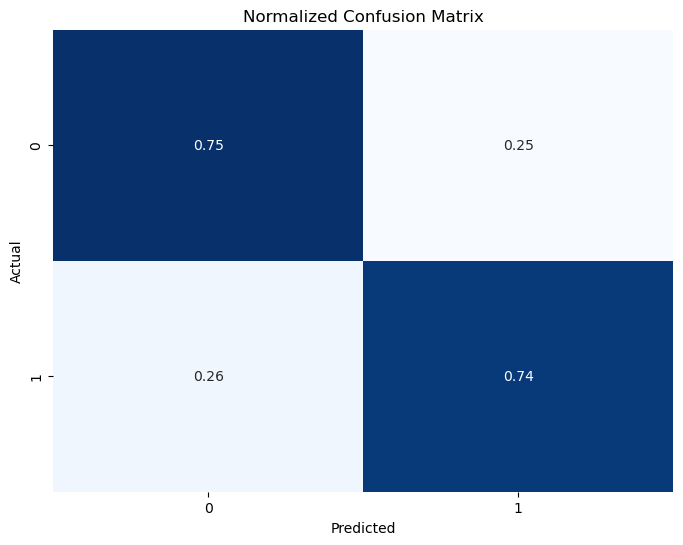

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have final_pca_svm_model as your trained model
y_pred = final_pca_svm_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Printing The Classification Report

In [16]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(y_test, y_pred_pca, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.75      0.85     58367
     Class 1       0.22      0.74      0.34      5592

    accuracy                           0.75     63959
   macro avg       0.59      0.74      0.59     63959
weighted avg       0.90      0.75      0.80     63959



#### Since The class 1 is less the Class 0 , We take in count The weighted Avg

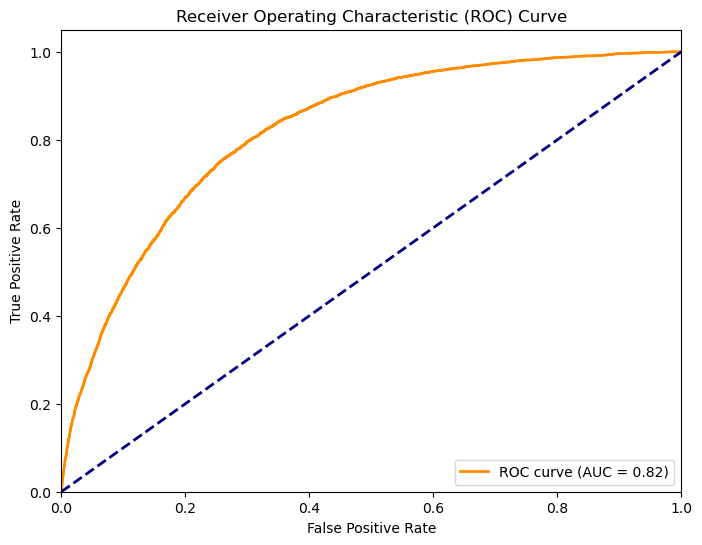

In [25]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_score = final_pca_svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Saving the PCA-SVM Model to a File

In [19]:
import joblib

# Save the model to a file
joblib.dump(final_pca_svm_model, 'final_pca_svm_model.pkl')

['final_pca_svm_model.pkl']